In [3]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import pandas as pd

In [6]:
data = sns.load_dataset('iris')
data.head(16)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [11]:
x = data['petal_length']
y = data['petal_width']

In [14]:
# Agregar columna constante = 1. para c'alculo del intercepto
x = sm.add_constant(x)

In [16]:
resultado = sm.OLS(y, x).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           4.68e-86
Time:                        09:10:32   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3631      0.040     -9.131      0.000      -0.442      -0.285
petal_length     0.4158      0.010     43.387      0.000       0.397       0.435
==============================================================================
Omnibus:                        5.765   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.555
Skew:                           0.359   Prob(JB):                       0.0622
Kurtosis:                       3.611   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
resultado.params

const          -0.363076
petal_length    0.415755
dtype: float64

In [19]:
resultado.rsquared

np.float64(0.9271098389904927)

In [20]:
import math

In [21]:
math.sqrt(resultado.rsquared)

0.9628654314027961

## Grafico de regresion

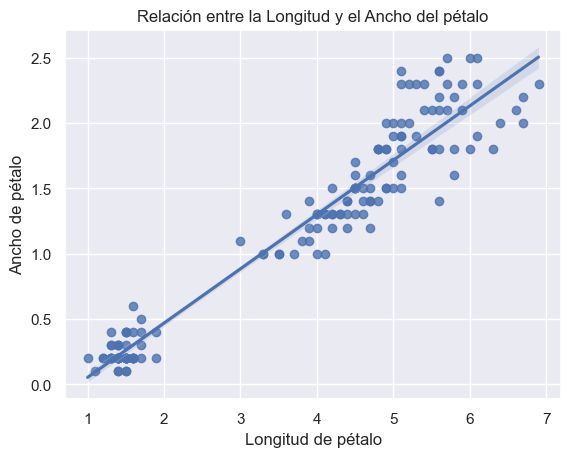

In [23]:
sns.set_theme(color_codes=True)
ax = sns.regplot(data = data, x = 'petal_length', y = 'petal_width')
ax.set_xlabel('Longitud de pétalo')
ax.set_ylabel('Ancho de pétalo')
ax.set_title('Relación entre la Longitud y el Ancho del pétalo')
ax.plot();

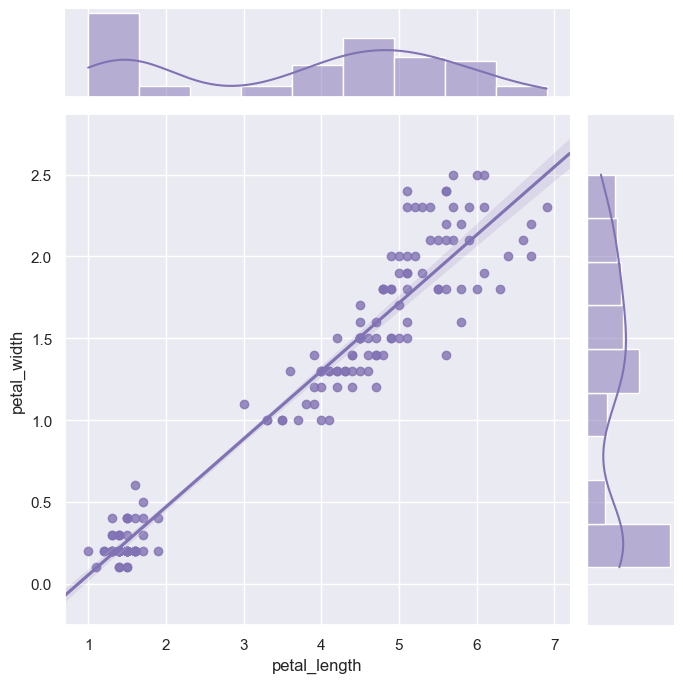

In [25]:
ax2 = sns.jointplot(data = data, x = 'petal_length', y = 'petal_width', 
                       kind = 'reg', truncate = False, color = 'm', height=7) 

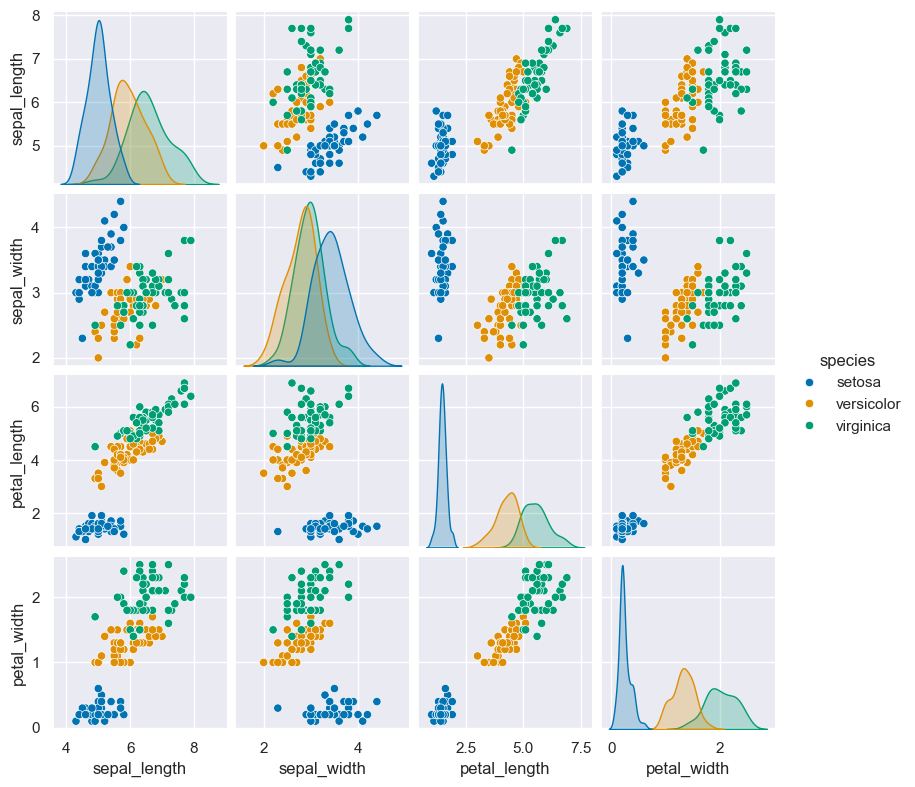

In [27]:
# Diagramas de dispersion de los atributos emparejados
sns.pairplot(data, hue = 'species', height = 2, palette = 'colorblind');